In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
def string_to_binary(input_string):
    # Convert each character to its binary representation
    binary_result = ' '.join(format(ord(char), '08b') for char in input_string)
    return binary_result

# Example usage
input_string = "Hello, World!"
binary_string = string_to_binary(input_string)
print(f"Binary representation of '{input_string}': {binary_string}")




Binary representation of 'Hello, World!': 01001000 01100101 01101100 01101100 01101111 00101100 00100000 01010111 01101111 01110010 01101100 01100100 00100001


In [15]:
def binary_to_string(binary_string):
    print(binary_string)
    # Split the binary string into individual binary codes
    binary_values = binary_string.split()
    print(binary_values)
    # Convert each binary code to the corresponding character
    ascii_characters = [chr(int(b, 2)) for b in binary_values]
    # Join the characters to form the original string
    original_string = ''.join(ascii_characters)
    return original_string

# Example usage
binary_string = "01001000 01100101 01101100 01101100 01101111 00101100 00100000 01010111 01101111 01110010 01101100 01100100 00100001"
original_string = binary_to_string(binary_string)
print(f"Original string: {original_string}")


01001000 01100101 01101100 01101100 01101111 00101100 00100000 01010111 01101111 01110010 01101100 01100100 00100001
['01001000', '01100101', '01101100', '01101100', '01101111', '00101100', '00100000', '01010111', '01101111', '01110010', '01101100', '01100100', '00100001']
Original string: Hello, World!


In [16]:


string1 = "Hello World!"
print("The String Representation is:", string1)

binary_converted = "".join(format(ord(c), "b") for c in string1)
print("The Binary_converted Representation is:", binary_converted)

TX_bit = [int(binary_converted)]

print('TX_bit:', TX_bit)
#print(np.size(TX_bit))


The String Representation is: Hello World!
The Binary_converted Representation is: 1001000110010111011001101100110111110000010101111101111111001011011001100100100001
TX_bit: [1001000110010111011001101100110111110000010101111101111111001011011001100100100001]


In [17]:
def convert_string(pattern):
    # Define a mapping from symbols to analog values
    symbol_to_value = {
        '0': '00000000',
        '1': '11111111'
    }
    
    # Convert the symbol pattern to analog values
    converted_string = ''.join([symbol_to_value.get(symbol, '') for symbol in pattern])
    
    return converted_string



Binary_converted : '1001000110010111011001101100110111110000010101111101111111001011011001100100100001':
TX Analog values 1 : [1001000110010111011001101100110111110000010101111101111111001011011001100100100001
 1001000110010111011001101100110111110000010101111101111111001011011001100100100001
 1001000110010111011001101100110111110000010101111101111111001011011001100100100001
 1001000110010111011001101100110111110000010101111101111111001011011001100100100001
 1001000110010111011001101100110111110000010101111101111111001011011001100100100001
 1001000110010111011001101100110111110000010101111101111111001011011001100100100001
 1001000110010111011001101100110111110000010101111101111111001011011001100100100001
 1001000110010111011001101100110111110000010101111101111111001011011001100100100001
 1001000110010111011001101100110111110000010101111101111111001011011001100100100001
 1001000110010111011001101100110111110000010101111101111111001011011001100100100001
 100100011001011101100110110011011

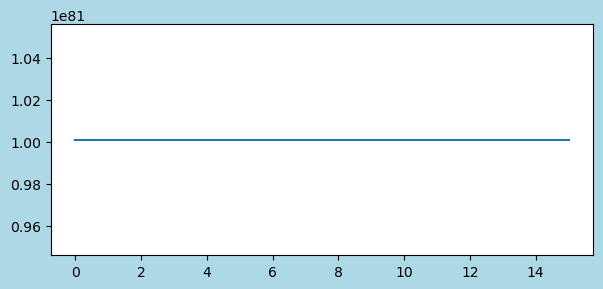

In [18]:
# Example usage

samplerate = 2 ** 10
numberofpointspersymbol = 2 ** 6
repetitions1 = samplerate / numberofpointspersymbol

TX_analog_values1 = np.repeat(TX_bit, repetitions1)


print(f"Binary_converted : '{binary_converted}':")
print(f"TX Analog values 1 : {TX_analog_values1}")

#TX_analog_float1 = [int(TX_analog_values1)]

#print(TX_analog_float1)

fig1 = plt.figure(figsize = (7,3), facecolor='lightblue')
ax1_1 = fig1.add_subplot(1, 1, 1)
ax1_1.plot(TX_analog_values1, "-")
